## **1. Data Preparation**

### **1) Background and Important Notes**

### **2) Import Required Libraries**

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **3) Upload the dataset**

In [4]:
songs = pd.read_csv("/content/data (1).csv")
artists = pd.read_csv("/content/data_by_artist (2).csv")
genres = pd.read_csv("/content/data_by_genres (1).csv")
year = pd.read_csv("/content/data_by_year (1).csv")
testdf = pd.read_csv("/content/data_by_genres (1).csv")

## **2. Data Modeling**

**0) Background**

**Cosine Similairty** is one of the common algorithms in bulding music recommendation systems. <br> It measures the cosine distance between songs and finds the songs that have similar cosine distance values with a particular song.

**1) Data Preprocessing** <br>
In this case, we need only the ‘songs’ data set, which includes all song and audio features information. <br>
The '`songs`' data set will be preprocessed with an appropriate form for **Cosine Similarity** model. 

**1-1) Remove unnecessary columns**

**Before Data Preprocessing**

In [5]:
songs.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


We will use only audio features that are numeric for building a simple music recommnedation function with cosine similarity. 
1. Remove the unnecessary columns such as song information as follows.
> `‘year’`, `‘explicit’`, `id`, `‘released_date’`. 

In [6]:
songs_cs = songs.drop(['year', 'explicit', 'id', 'release_date'], 1)

<ipython-input-6-6da17b814852>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  songs_cs = songs.drop(['year', 'explicit', 'id', 'release_date'], 1)


2. Create a copy of the new data set without artist and song names for the following reasons.
> The `copied` data set (`songs_cs_copy`) is used for building a cosine similarity model later. <br>
> The `original` data set (`songs_cs`) is used for creating a function to find artist and song name later.

In [7]:
songs_cs_copy = songs_cs.drop(["artists", "name"], 1)

<ipython-input-7-74a295e96acf>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  songs_cs_copy = songs_cs.drop(["artists", "name"], 1)


**1-2) Normalization**

Some attributes such as **`duration_ms`**, **`key`**, and **`mode`** have numeric values that are not in the same scale. 

In [8]:
songs_cs_copy

,valence,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,0.982,0.279,831667,0.2110,0.878000,10,0.6650,-20.096,1,4,0.0366,80.954
1,0.9630,0.732,0.819,180533,0.3410,0.000000,7,0.1600,-12.441,1,5,0.4150,60.936
2,0.0394,0.961,0.328,500062,0.1660,0.913000,3,0.1010,-14.850,1,5,0.0339,110.339
3,0.1650,0.967,0.275,210000,0.3090,0.000028,5,0.3810,-9.316,1,3,0.0354,100.109
4,0.2530,0.957,0.418,166693,0.1930,0.000002,3,0.2290,-10.096,1,2,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78456,0.9540,0.979,0.646,196389,0.7300,0.000008,11,0.0960,-5.804,0,0,0.0364,135.721
78457,0.9610,0.951,0.629,206253,0.3110,0.000069,4,0.0574,-11.729,0,0,0.0392,130.569
78458,0.6770,0.981,0.513,205084,0.0626,0.000000,6,0.1300,-13.353,0,0,0.3170,179.262
78459,0.4120,0.571,0.694,97000,0.2290,0.000000,10,0.3490,-17.280,0,0,0.7030,103.913


In [9]:
songs_cs_copy.describe()

,valence,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,78461.000000,78461.000000,78461.000000,7.846100e+04,78461.000000,78461.000000,78461.000000,78461.000000,78461.000000,78461.000000,78461.000000,78461.000000,78461.000000
mean,0.538942,0.531114,0.547115,2.259398e+05,0.461097,0.169344,5.205949,0.199907,-11.641623,0.708033,33.933279,0.106950,116.326052
std,0.258748,0.380344,0.174090,1.193096e+05,0.264532,0.315728,3.501205,0.162398,5.675266,0.454670,24.750449,0.181335,30.731863
min,0.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.334000,0.121000,0.426000,1.687330e+05,0.235000,0.000000,2.000000,0.099400,-14.912000,0.000000,4.000000,0.035200,92.998000
50%,0.553000,0.581000,0.559000,2.025600e+05,0.438000,0.000193,5.000000,0.136000,-10.831000,1.000000,39.000000,0.045800,114.360000
75%,0.753000,0.929000,0.678000,2.563330e+05,0.678000,0.108000,8.000000,0.255000,-7.312000,1.000000,54.000000,0.079200,134.661000
max,1.000000,0.996000,0.988000,4.120258e+06,1.000000,1.000000,11.000000,0.999000,3.855000,1.000000,100.000000,0.970000,243.372000


Especially, **`duration_ms`** columns has many outliers when it is compared with other attributes from the copied data set.

<Axes: >

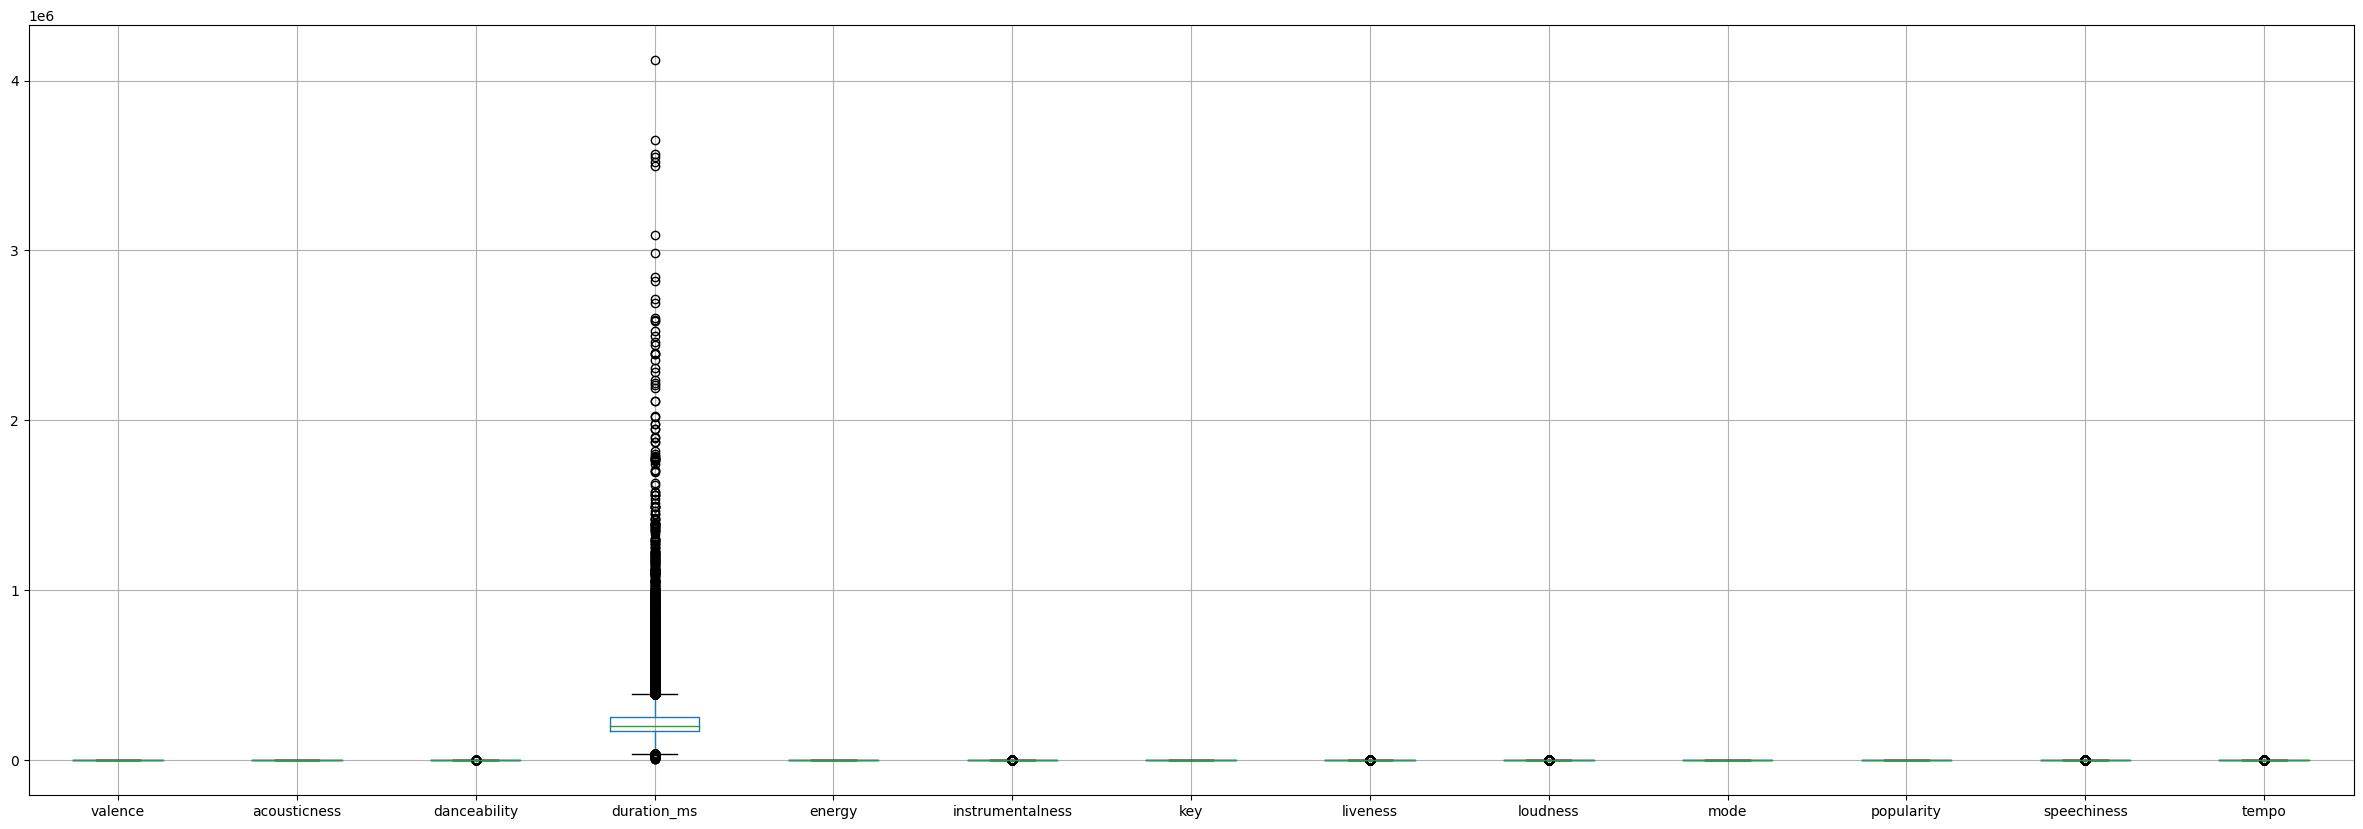

In [10]:
songs_cs_copy.boxplot(figsize=(30,10))

We need to make all the attributes that will be used in modeling cosine similarity be in a single (or at least similart) scale. <br>
The **`StandardScaler()`** function tranform all original attributes as in the similar scale. 

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

col = songs_cs_copy.columns
songs_cs_copy[col] = scaler.fit_transform(songs_cs_copy[col])

In [12]:
songs_cs_copy

,valence,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,-1.853328,1.185477,-1.540105,5.076969,-0.945439,2.244530,1.369266,2.863925,-1.489698,0.642155,-1.209411,-0.387958,-1.150997
1,1.638897,0.528174,1.561766,-0.380582,-0.454002,-0.536363,0.512413,-0.245740,-0.140854,0.642155,-1.169008,1.698797,-1.802377
2,-1.930624,1.130264,-1.258639,2.297585,-1.115551,2.355386,-0.630058,-0.609047,-0.565330,0.642155,-1.169008,-0.402848,-0.194817
3,-1.445206,1.146039,-1.563082,-0.133601,-0.574971,-0.536275,-0.058823,1.115124,0.409785,0.642155,-1.249815,-0.394576,-0.527698
4,-1.105104,1.119747,-0.741661,-0.496584,-1.013484,-0.536357,-0.630058,0.179145,0.272346,0.642155,-1.290218,-0.380238,-0.477067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78456,1.604114,1.177589,0.568018,-0.247683,1.016529,-0.536337,1.654884,-0.639836,1.028614,-1.557257,-1.371025,-0.389061,0.631106
78457,1.631167,1.103971,0.470367,-0.165007,-0.567410,-0.536144,-0.344441,-0.877525,-0.015396,-1.557257,-1.371025,-0.373620,0.463462
78458,0.533567,1.182848,-0.195961,-0.174805,-1.506433,-0.536363,0.226795,-0.430473,-0.301552,-1.557257,-1.371025,1.158358,2.047918
78459,-0.490603,0.104870,0.843740,-1.080723,-0.877393,-0.536363,1.369266,0.918075,-0.993506,-1.557257,-1.371025,3.287025,-0.403917


In [13]:
songs_cs_copy.describe()

,valence,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,7.846100e+04,7.846100e+04,7.846100e+04,7.846100e+04,7.846100e+04,7.846100e+04,7.846100e+04,7.846100e+04,7.846100e+04,7.846100e+04,7.846100e+04,7.846100e+04,7.846100e+04
mean,7.389695e-17,-2.782003e-16,2.738534e-16,-8.259071e-17,-4.057088e-17,9.852927e-17,1.186336e-17,9.925375e-17,-1.912627e-16,7.099903e-17,3.477504e-17,-1.275085e-16,-9.128447e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.082896e+00,-1.396411e+00,-3.142739e+00,-1.850926e+00,-1.743079e+00,-5.363628e-01,-1.486912e+00,-1.230980e+00,-8.520955e+00,-1.557257e+00,-1.371025e+00,-5.897956e-01,-3.785218e+00
25%,-7.920564e-01,-1.078276e+00,-6.957071e-01,-4.794851e-01,-8.547117e-01,-5.363628e-01,-9.156761e-01,-6.188998e-01,-5.762545e-01,-1.557257e+00,-1.209411e+00,-3.956788e-01,-7.590884e-01
50%,5.433265e-02,1.311622e-01,6.827222e-02,-1.959604e-01,-8.731395e-02,-5.357515e-01,-5.882282e-02,-3.935260e-01,1.428353e-01,6.421549e-01,2.047136e-01,-3.372232e-01,-6.397478e-02
75%,8.272907e-01,1.046129e+00,7.518326e-01,2.547439e-01,8.199543e-01,-1.942939e-01,7.980304e-01,3.392466e-01,7.628983e-01,6.421549e-01,8.107671e-01,-1.530328e-01,5.966142e-01
max,1.781894e+00,1.222286e+00,2.532536e+00,3.264066e+01,2.037206e+00,2.630941e+00,1.654884e+00,4.920615e+00,2.730572e+00,6.421549e-01,2.669331e+00,4.759445e+00,4.134040e+00


Even though there are still many outlisers, all the values are in the similar range though the normalization.

<Axes: >

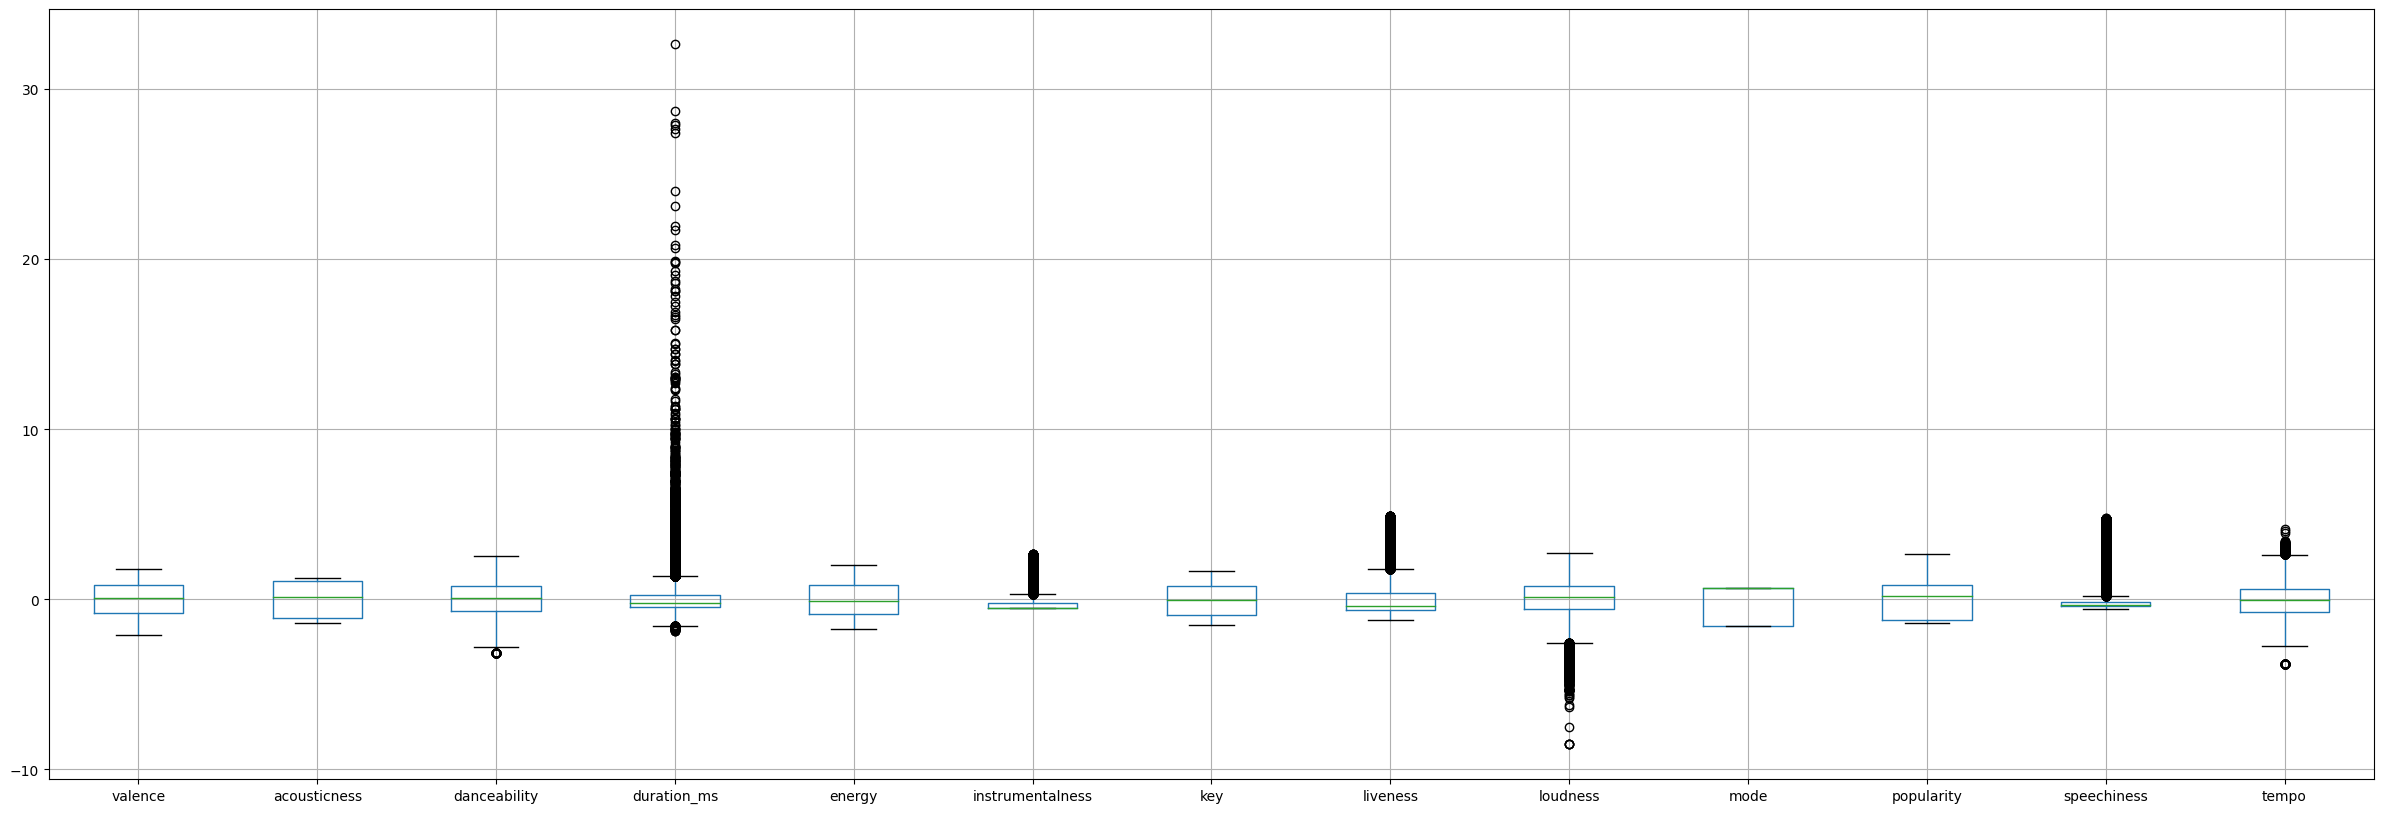

In [14]:
songs_cs_copy.boxplot(figsize = (30, 10))

In [15]:
songs_cs_copt_with_atsn = songs_cs_copy
songs_cs_copt_with_atsn['artists'] = songs_cs['artists']
songs_cs_copt_with_atsn['song name'] = songs_cs['name']

Song find function

In [18]:
def find_song(word, artist):
  a=0
  b=0
  for i in songs_cs["artists"]:
    if word.lower() in i.lower() and ["name"][a].lower(): 
      print ("Song Name: ", songs_cs["name"][a], ", Artists: ",songs_cs["artists"][a])
      b+1
    a+1
    if b == 0:
      print("No recommendations found, please try something else!")




In [ ]:
#Checkpoint to see if the function works 
#word = "love"
#artist = "Taylor"

#find_song (word,artist)

In [22]:
#def sim_track_find(word,artists):
  #a = 0
  #b = 0
  #song = []
  #indexes = []
  #for i in songs_cs["song_name"]:
   # if word.lower() in i.lower() and artist.lower() in songs_cs["artist"][a].lower():
      #songs.append(songs_cs[a:a+1].values)
      #indexes.append(a)
      #b+=1
    #a+=1
    #if b == 0:
      #  print("Nothing found, please try something else :)")
       # return 0
        
    #return song[0][0], indexes[0]

In [23]:
#Checkpoint 
#word = "Love"
#artist = "Taylor"

#sim_track_find(word,artist)

KeyError: ignored

In [ ]:
def similar_tracks(songs_cs,number,song = "",artist = ""):

    if (sim_track_find(song,artist) == 0):
        return 0
    else:
        x=sim_track_find(song,artist)[0]
        index = sim_track_find(song,artist)[1]
    p = []
    count=0
    for i in songs_cs.values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    song_names = songs_cs["name"]
    artist_names = songs_cs["artist"]

    print("\nSimilar songs to ",song_names[index]," by ", artist_names[index],"\n")
    for i in range(1,number+1):
        print(i,"- ",song_names[p[i][1]],", ",artist_names[p[i][1]])

In [ ]:
song = "ocean eyes"
artist = "billie"
num = 5

similar_tracks(df,int(num),song,artist)